In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import math

ImportError: Unable to import required dependencies:
numpy: cannot import name randbits

In [2]:
df = pd.read_csv('/Users/anjalibharti/Downloads/Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.drop('sl_no',axis = 1,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df.isnull().sum()  # 67 null values in salary column

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
df.describe(include = ['object'])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


<h1>Numerical Columns - Univariate Analysis</h1>


<h3>Conclusions:</h3>

(Excluding salary column here)
1. All numerical columns are normally(almost) distributed.
2. No columns are skewed.
3. No values missing in any columns
4. Some outliers in 'hsc_p' column and one outlier in 'degree_p' column
5. Nothing unusual data is seen in 'hsc_p' and 'degree_p' , therefore outlier is not removed

In [9]:
def plot_histogram(df, cols, bins=20):
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(6, 5))
            df[col].plot(kind='hist', bins=bins, edgecolor='black')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.75)
            plt.show()
        else:
            print(f"Column '{col}' does not exist in the DataFrame.")

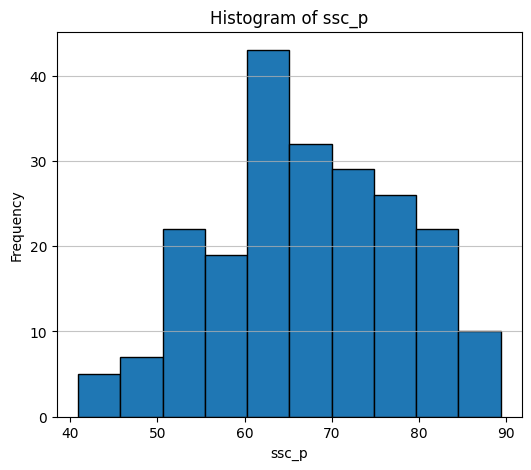

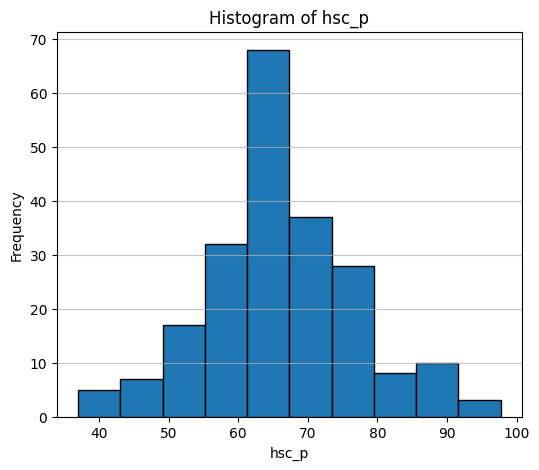

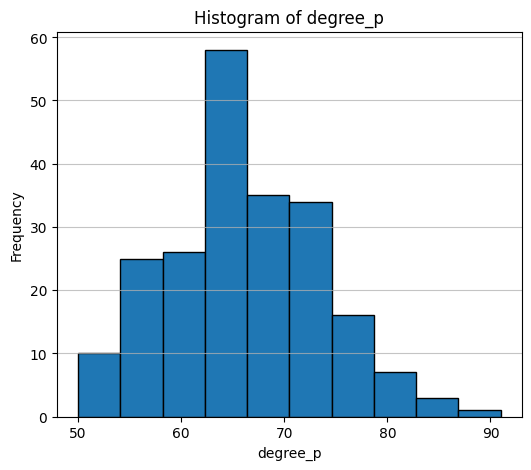

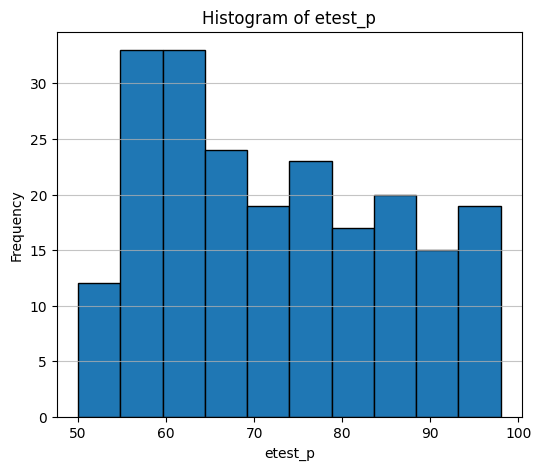

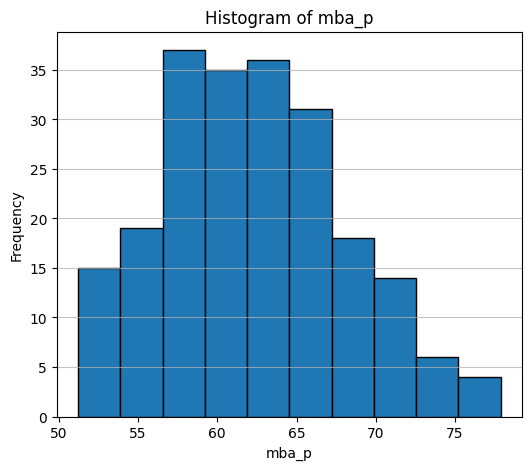

In [10]:
plot_histogram(df,['ssc_p','hsc_p','degree_p','etest_p','mba_p'],bins=10)

In [11]:
def plot_kde(df, cols):
    for col in cols:
        if col in df.columns:
            skewness = df[col].skew()
            print(f"Skewness of {col}: {skewness:.2f}")
            plt.figure(figsize=(5, 5))
            df[col].plot(kind='kde')
            plt.title(f'KDE Plot of {col}')
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.grid(axis='y', alpha=0.75)
            plt.show()
        else:
            print(f"Column '{col}' does not exist in the DataFrame.")

Skewness of ssc_p: -0.13


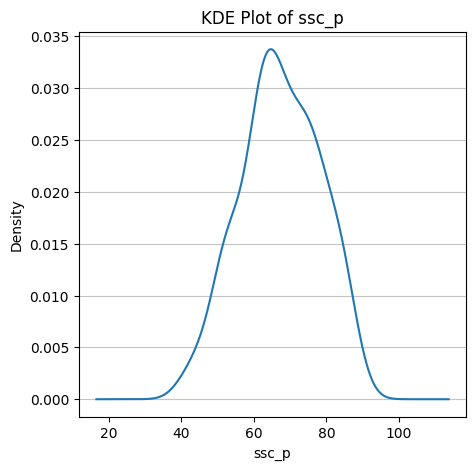

Skewness of hsc_p: 0.16


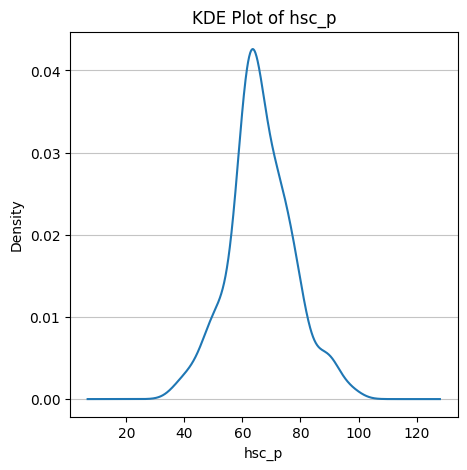

Skewness of degree_p: 0.24


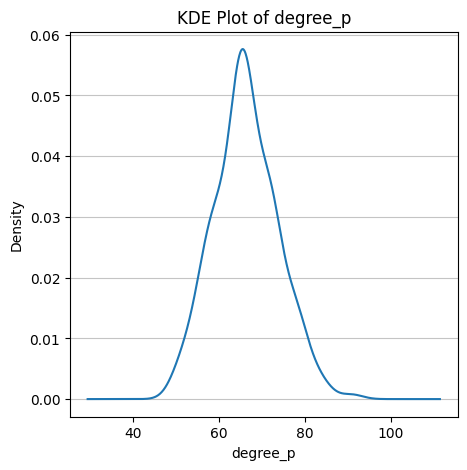

Skewness of etest_p: 0.28


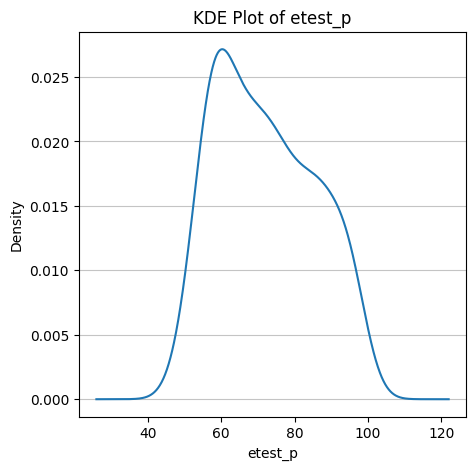

Skewness of mba_p: 0.31


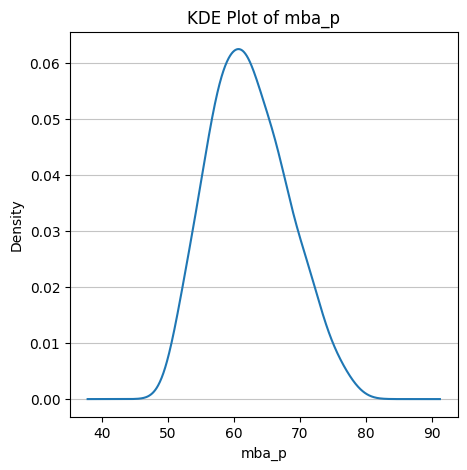

In [12]:
plot_kde(df,['ssc_p','hsc_p','degree_p','etest_p','mba_p'])

In [13]:
def plot_box(df, cols):
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(5, 5))
            df.boxplot(column=col)
            plt.title(f'Box plot of {col}')
            # plt.xlabel(col)
            plt.ylabel('Values')
            plt.grid(axis='y', alpha=0.75)
            plt.show()
        else:
            print(f"Column '{col}' does not exist in the DataFrame.")

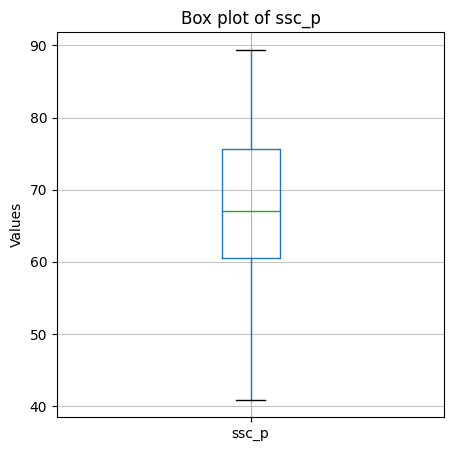

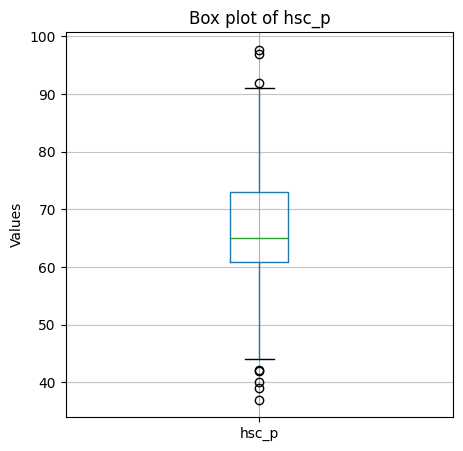

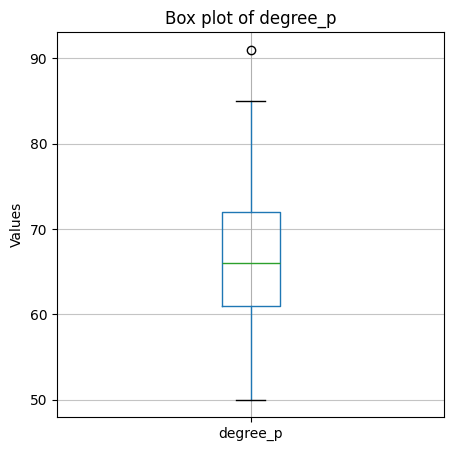

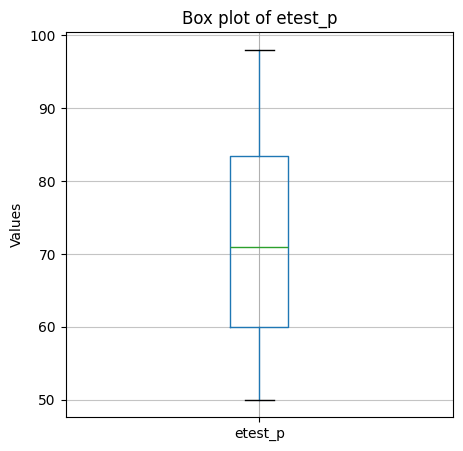

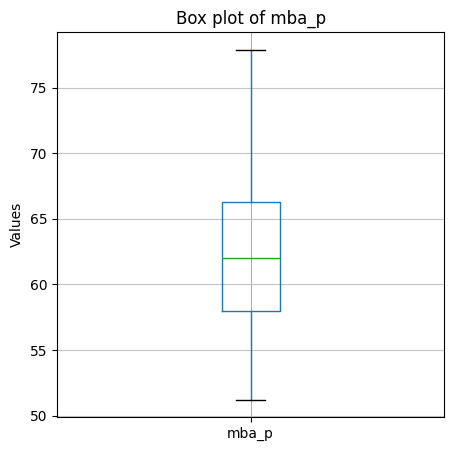

In [14]:
plot_box(df,['ssc_p','hsc_p','degree_p','etest_p','mba_p'])

In [15]:
df['hsc_p'].describe()

count    215.000000
mean      66.333163
std       10.897509
min       37.000000
25%       60.900000
50%       65.000000
75%       73.000000
max       97.700000
Name: hsc_p, dtype: float64

In [16]:
df[df['hsc_p'] <= 43 ]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
42,M,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,NaN
49,F,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,NaN
120,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,NaN
169,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,NaN
206,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN


In [17]:
df[df['hsc_p'] >= 90]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.0,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
24,M,76.50,Others,97.7,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
78,M,84.00,Others,90.9,Others,Science,64.50,Sci&Tech,No,86.04,Mkt&Fin,59.42,Placed,270000.0
90,F,85.00,Others,90.0,Others,Commerce,82.00,Comm&Mgmt,No,92.00,Mkt&Fin,68.03,Placed,300000.0
107,M,82.00,Others,90.0,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
134,F,77.44,Central,92.0,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,Placed,250000.0
177,F,73.00,Central,97.0,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


<h1>Categorical Columns - Univariate Analysis</h1>

<h3>Conclusions:</h3>

1. Significant difference in division of 'gender', 'hsc_b','degree_t' (very less student with degree in Sci&Tech and much less in others).
2. Most students (more than 65% have no work experience.
3. More than 68% students have been placed.

In [364]:
def plot_pie(df, cols):
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(4, 4))
            counts = df[col].value_counts()
            counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f'Pie chart of {col}')
            plt.ylabel(None)  
            plt.axis('equal')  
            plt.show()
        else:
            print(f"Column '{col}' does not exist in the DataFrame.")

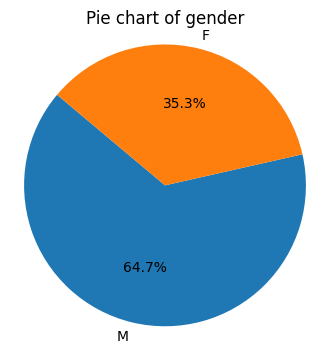

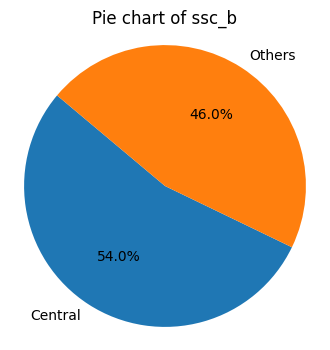

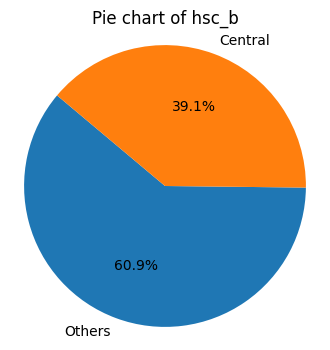

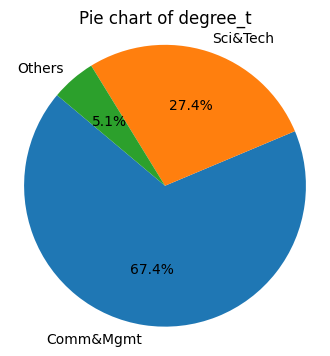

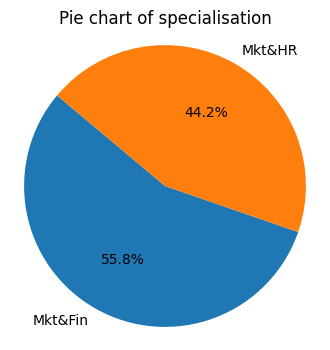

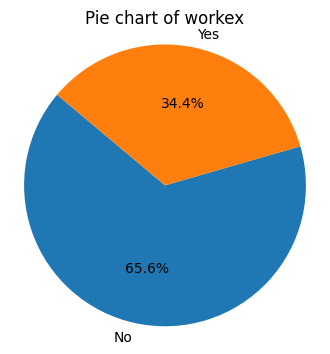

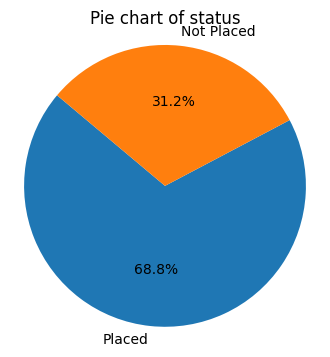

In [365]:
plot_pie(df,['gender','ssc_b','hsc_b','degree_t','specialisation','workex','status'])

<h1>Bivariate analysis of categorical columns</h1>

<h3>Conclusions:</h3>

1. Status does not depend much on 'ssc_b' and 'hsc_b'.
2. Almost same chances of being placed and not placed in case of Central board or other board.
3. Status is significantly depending on 'gender', 'degree_t', 'workex' and 'specialisation'.

In [41]:
pd.crosstab(df['status'],df['gender'],normalize='columns')*100

gender,F,M
status,,
Not Placed,36.842105,28.057554
Placed,63.157895,71.942446


In [43]:
pd.crosstab(df['status'],df['ssc_b'],normalize='columns')*100

ssc_b,Central,Others
status,,
Not Placed,32.758621,29.292929
Placed,67.241379,70.707071


In [366]:
pd.crosstab(df['status'],df['hsc_b'],normalize='columns')*100

hsc_b,Central,Others
status,,
Not Placed,32.142857,30.534351
Placed,67.857143,69.465649


In [45]:
pd.crosstab(df['status'],df['degree_t'],normalize='columns')*100

degree_t,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,29.655172,54.545455,30.508475
Placed,70.344828,45.454545,69.491525


In [46]:
pd.crosstab(df['status'],df['workex'],normalize='columns')*100

workex,No,Yes
status,,
Not Placed,40.425532,13.513514
Placed,59.574468,86.486486


In [372]:
pd.crosstab(df['status'],df['specialisation'],normalize='columns')*100

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,20.833333,44.210526
Placed,79.166667,55.789474


<h1>Data preprocessing</h1>

<h3>Using One Hot-Encoding</h3>

In [369]:
df['gender'] = df.gender.map({'F':0, 'M':1})
df.tail(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,1,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,1,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,1,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,0,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,1,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [370]:
df['ssc_b'] = df.ssc_b.map({'Central':1,'Others':0})
df['hsc_b'] = df.hsc_b.map({'Central':1,'Others':0})
df.tail(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,1,80.6,0,82.0,0,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,1,58.0,0,60.0,0,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,1,67.0,0,67.0,0,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,0,74.0,0,66.0,0,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,1,62.0,1,58.0,0,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [381]:
df['workex'] = df.workex.map({'Yes':1,'No':0})

In [382]:
df['status'] = df.status.map({'Placed': 1, 'Not Placed': 0})

In [373]:
pd.get_dummies(df.hsc_s, prefix='hsc_s').astype(int).head(5)

,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [378]:
# Using dummy variable such that dropping first dummy variable
dummies = pd.get_dummies(df.hsc_s, prefix='hsc_s').iloc[:, 1:].astype(int) 

In [375]:
dummies1 = pd.get_dummies(df.degree_t, prefix='degree_t').iloc[:, 1:].astype(int)

In [376]:
dummies2 = pd.get_dummies(df.specialisation, prefix='specialisation').iloc[:, 1:].astype(int)

In [377]:
df = pd.concat([df, dummies], axis=1)
df = pd.concat([df, dummies1], axis=1)
df = pd.concat([df, dummies2], axis=1)

In [379]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
0,1,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0,1,1
1,1,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1,0,1,0
2,1,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0,0,0,0,0
3,1,56.00,1,52.00,1,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0,1,0,1,1
4,1,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,0,0,0,0


In [380]:
df.drop(['hsc_s','degree_t','specialisation'],axis=1,inplace=True)

In [383]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,mba_p,status,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
0,1,67.00,0,91.00,0,58.00,0,55.0,58.80,1,270000.0,1,0,0,1,1
1,1,79.33,1,78.33,0,77.48,1,86.5,66.28,1,200000.0,0,1,0,1,0
2,1,65.00,1,68.00,1,64.00,0,75.0,57.80,1,250000.0,0,0,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,59.43,0,NaN,0,1,0,1,1
4,1,85.80,1,73.60,1,73.30,0,96.8,55.50,1,425000.0,1,0,0,0,0


<h3>Multivariate Analysis</h3>

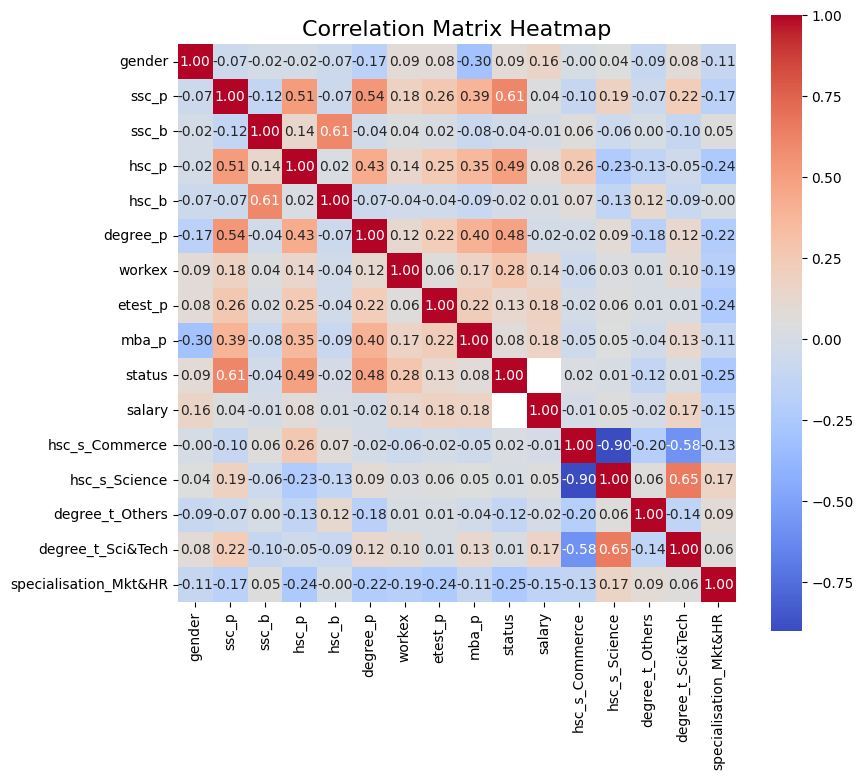

In [384]:
corr = df.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

<h1>Logistic Regression model for predicting the status of being placed</h1>

<h3>Accuracy: 88.4%</h3>

In [385]:
X = df.drop(['ssc_b','hsc_b','salary','status'],axis =1)

In [386]:
Y = df['status']

In [387]:
min_max_scale = MinMaxScaler()
X_norm = min_max_scale.fit_transform(X)

In [388]:
X_norm[:,:9].max()

1.0000000000000002

In [389]:
train=[]
test=[]
cv=[]
for i in range(0,102):
    X_train,X_test,y_train,y_test = train_test_split(X_norm,Y,test_size=0.2,random_state=i)

    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    
    train_pred=lr.predict(X_train)
    test_pred=lr.predict(X_test)
    
    train.append(accuracy_score(y_train,train_pred))
    test.append(accuracy_score(y_test,test_pred))
    
    cv.append(cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy').mean())
em = pd.DataFrame({'Train':train, 'Test':test, 'CV':cv})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm['CV']==gm['CV'].max()].index.to_list()[0]
print('Best Random State:',rs)


Best Random State: 28


In [390]:
em[27:29]

,Train,Test,CV
27,0.877907,0.906977,0.860672
28,0.889535,0.883721,0.884034


In [391]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,Y,test_size=0.2,random_state= 28)
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [392]:
y_pred_status = lr.predict(X_test)

In [393]:
metrics.mean_absolute_error(y_test,y_pred_status)

0.11627906976744186

In [394]:
precision_lr = precision_score(y_test, y_pred_status)
recall_lr = recall_score(y_test, y_pred_status)
f1_lr = f1_score(y_test, y_pred_status)
accuracy_lr = accuracy_score(y_test, y_pred_status)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

Logistic Regression Accuracy: 0.8837209302325582
Logistic Regression Precision: 0.8571428571428571
Logistic Regression Recall: 1.0
Logistic Regression F1-score: 0.923076923076923


In [400]:
lr.score(X_train,y_train)
lr.score(X_test,y_test)

0.8837209302325582

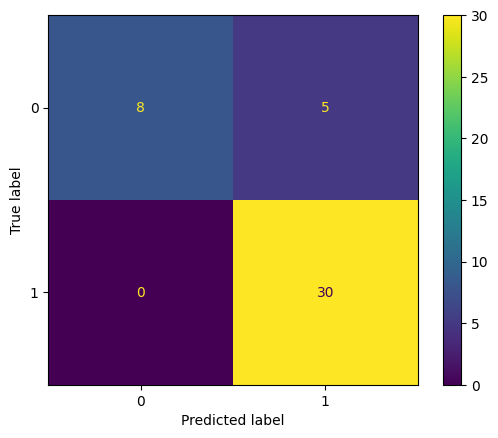

In [396]:
cm = confusion_matrix(y_test, y_pred_status)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [397]:
X_features = ['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p',
       'hsc_s_Commerce', 'hsc_s_Science', 'degree_t_Others',
       'degree_t_Sci&Tech', 'specialisation_Mkt&HR']

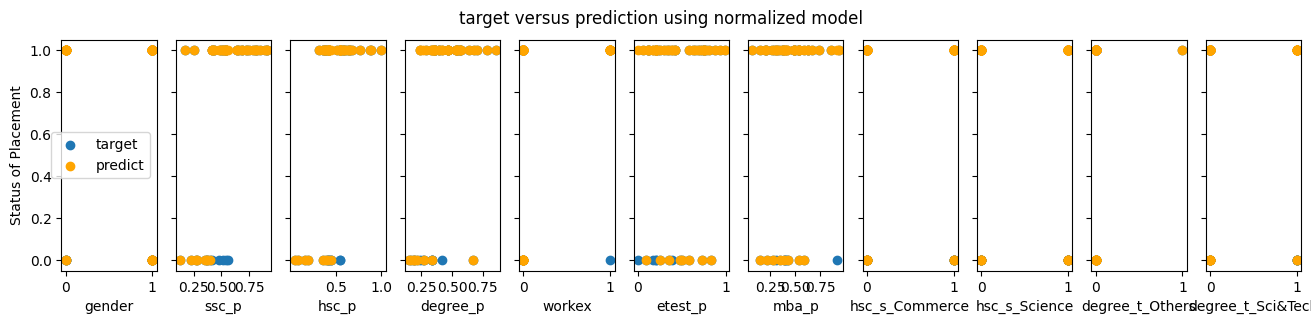

In [398]:
fig, ax = plt.subplots(1, 11, figsize=(16, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:, i], y_test, label='target')
    ax[i].set_xlabel(X_features[i])  # X[i] should be replaced with appropriate feature names
    ax[i].scatter(X_test[:, i], y_pred_status, color= 'orange', label='predict')
ax[0].set_ylabel("Status of Placement")
ax[0].legend()
fig.suptitle("target versus prediction using normalized model")
plt.show()

<h1>Linear Regression Model for predicting salary if placed</h1>

Tried a lot but not able to fit a good linear regression model into this data

In [42]:
df = pd.read_csv('/Users/anjalibharti/Downloads/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [46]:
df1 = df.loc[df['status'] == 'Placed']

In [47]:
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0


In [48]:
df1 = df1.drop(['status','sl_no'],axis=1)

Salary column is right skewed and it has a lot of outliers

In [6]:
plot_histogram(df1,['salary'])

NameError: name 'plot_histogram' is not defined

Skewness of salary: 3.57


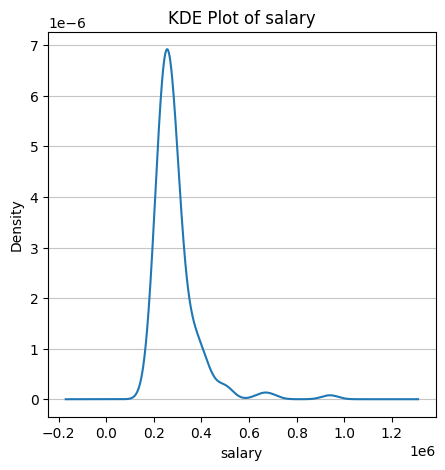

In [610]:
plot_kde(df1,['salary'])

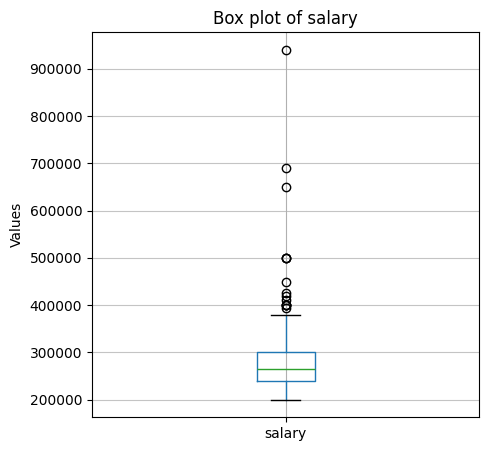

In [611]:
plot_box(df1,['salary'])

In [49]:
df1 = df1[df1['salary'] < 600000]

In [50]:
df1.salary.skew()

1.5115856381066786

In [51]:
df1.salary.describe()

count       142.000000
mean     278598.591549
std       62270.863359
min      200000.000000
25%      240000.000000
50%      262000.000000
75%      300000.000000
max      500000.000000
Name: salary, dtype: float64

In [52]:
df1.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [53]:
df1['ssc_b'] = df.ssc_b.map({'Central':1,'Others':0})
df1['hsc_b'] = df.hsc_b.map({'Central':1,'Others':0})
df1['gender'] = df.gender.map({'M':1,'F':0})
df1['workex'] = df.workex.map({'Yes':1,'No':0})
df1['specialisation'] = df.specialisation.map({'Mkt&Fin':1,'Mkt&HR':0})

In [54]:
df1['hsc_s'] = df.hsc_s.map({'Commerce':0,'Science':1,'Arts':2})
df1['degree_t'] = df.degree_t.map({'Comm&Mgmt':0,'Sci&Tech':1,'Others':2})

In [55]:
df1.head()
# df1.isnull().sum()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
1,1,79.33,1,78.33,0,1,77.48,1,1,86.50,1,66.28,200000.0
2,1,65.00,1,68.00,1,2,64.00,0,0,75.00,1,57.80,250000.0
4,1,85.80,1,73.60,1,0,73.30,0,0,96.80,1,55.50,425000.0
7,1,82.00,1,64.00,1,1,66.00,1,1,67.00,1,62.14,252000.0
8,1,73.00,1,79.00,1,0,72.00,0,0,91.34,1,61.29,231000.0


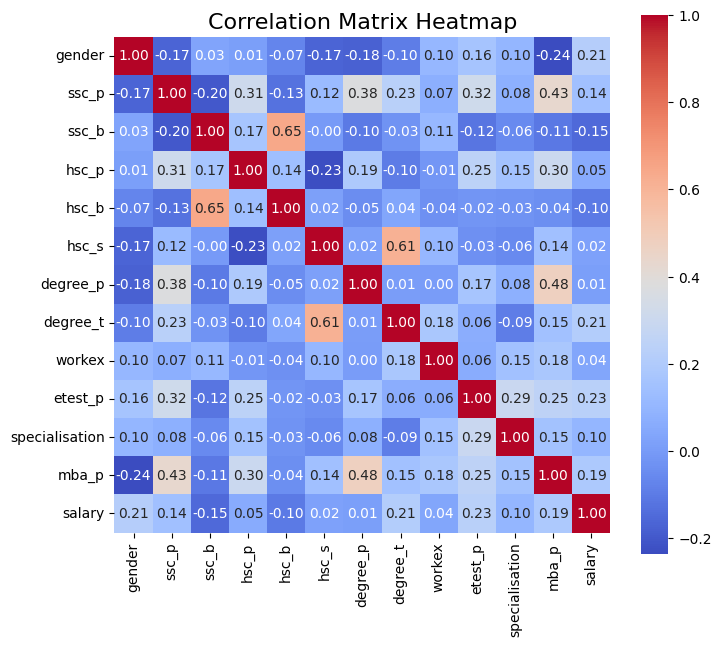

In [56]:
corr = df1.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [57]:
x = df1.drop(['salary','hsc_b','ssc_b','workex'],axis = 1)

In [58]:
y = df1['salary']/100000

In [59]:
y.describe()

count    142.000000
mean       2.785986
std        0.622709
min        2.000000
25%        2.400000
50%        2.620000
75%        3.000000
max        5.000000
Name: salary, dtype: float64

In [60]:
sc = StandardScaler()
x_norm = sc.fit_transform(x)
# x_norm = min_max_scale.fit_transform(x_some)

In [61]:
x_train,x_test,Y_train,Y_test = train_test_split(x_norm,y,test_size=0.2,random_state= 42)

In [62]:
x.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'etest_p',
       'specialisation', 'mba_p'],
      dtype='object')

In [63]:
lir = SGDRegressor()
lir.fit(x_train,Y_train)    

SGDRegressor()

In [64]:
y_pred_salary = lir.predict(x_test)

In [65]:
metrics.mean_absolute_error(Y_test,y_pred_salary)

0.49978815252446274

In [66]:
rmse = math.sqrt(metrics.mean_squared_error(Y_test,y_pred_salary))
rmse

0.7571239693003138

In [107]:
x_features = ['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'etest_p','specialisation', 'mba_p']

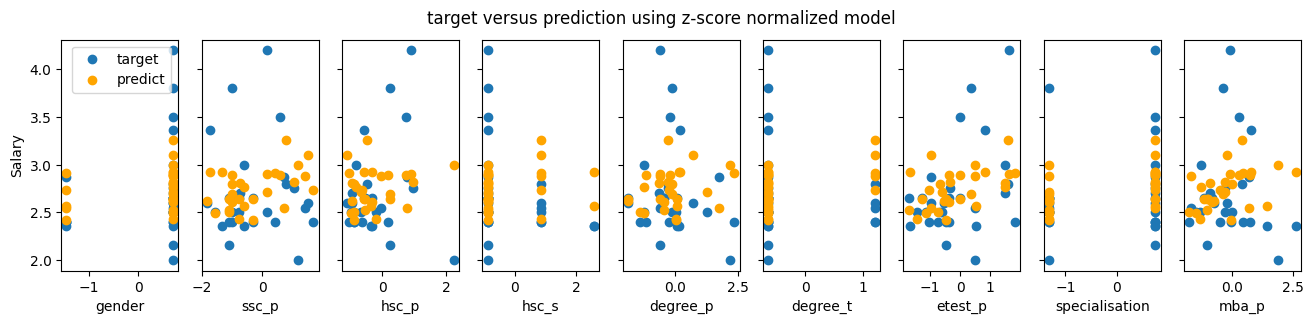

In [108]:
fig, ax = plt.subplots(1, 9, figsize=(16, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_test[:, i], Y_test, label='target')
    ax[i].set_xlabel(x_features[i])  # X[i] should be replaced with appropriate feature names
    ax[i].scatter(x_test[:, i], y_pred_salary, color= 'orange', label='predict')
ax[0].set_ylabel("Salary")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [109]:
metrics.r2_score(Y_test,y_pred_salary)

-0.03627291900527507